In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonaldsdataset/mcd.csv


In [75]:
import re
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("/kaggle/input/mcdonaldsdataset/mcd.csv")
df.head()

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
0,Black Coffee®,200ml,NaN,NaN,No Allergens,6.80,0.00,0.00,0.00,0.00,0.00,1.70,0.00,0.00,0.00,Perfectly brewed for any time of the day.
1,Butter Chicken Grilled Burger,153g,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,4.65,0.00,31.93,39.76,6.55,4.71,919.59,Premium grilled chicken patty topped with makh...
2,Butter Paneer Grilled Burger,142g,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,8.29,0.00,6.62,44.12,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...
3,Cheesy Fries,150g,"Salted Fries, Smoky Chipotle Sauce","Hi, it’s cheese on this side!",Milk,453.92,7.19,21.10,10.64,0.59,3.89,41.94,0.95,0.40,430.79,The all-time favourite fries with a generous d...
4,Chicken Maharaja Mac®,296g,"Maharaja bun crown, Haberno sauce, Shredded le...",A royal treat.,"Cereal containing gluten, Milk, Soya",689.12,34.00,36.69,10.33,0.25,81.49,55.39,8.92,6.14,1854.71,\n A double-dec...


- Number of rows and columns

In [3]:
df.shape

(42, 16)

In [4]:
df.describe()

,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,327.503810,10.251667,13.980095,6.457143,0.125238,21.062619,39.231857,13.296905,9.305714,474.297857
std,206.453133,10.042711,11.748440,5.208211,0.111994,28.125409,21.680327,14.939201,12.297709,472.896404
min,6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,0.000000,0.000000,0.000000
25%,176.622500,2.832500,5.790000,3.670000,0.060000,2.840000,23.632500,2.922500,1.080000,85.770000
50%,306.245000,6.335000,11.375000,5.065000,0.100000,6.585000,39.305000,8.565000,5.175000,309.770000
75%,401.737500,15.340000,18.807500,8.125000,0.175000,31.740000,51.207500,17.287500,12.902500,709.437500
max,832.670000,47.600000,46.900000,21.110000,0.590000,115.000000,117.780000,66.930000,55.160000,1854.710000


In [5]:
df.dtypes

name             object
serving_size     object
ingredients      object
tag              object
allergy          object
energy          float64
protein         float64
total_fat       float64
sat_fat         float64
trans_fat       float64
chol            float64
carbs           float64
total_sugar     float64
added_sugar     float64
sodium          float64
description      object
dtype: object

In [14]:
#df.columns
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i,df[i].isnull().sum())

ingredients 6
tag 6


In [37]:
ingredients_word = ""
stopwords = set(STOPWORDS)
for val in df.ingredients:
    val = str(val)
    tokens  = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    ingredients_word +="".join(tokens)+""
wc_ingredients = WordCloud(width=800, height=800,background_color = 'white',stopwords = stopwords, min_font_size = 10).generate(ingredients_word)

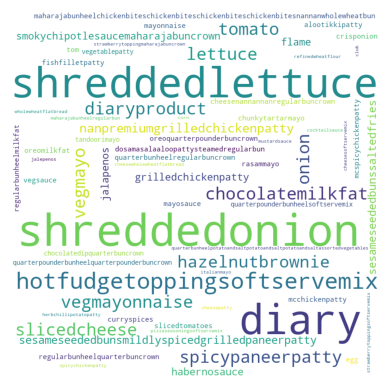

In [46]:
plt.imshow(wc_ingredients)
plt.axis("off")
plt.show()

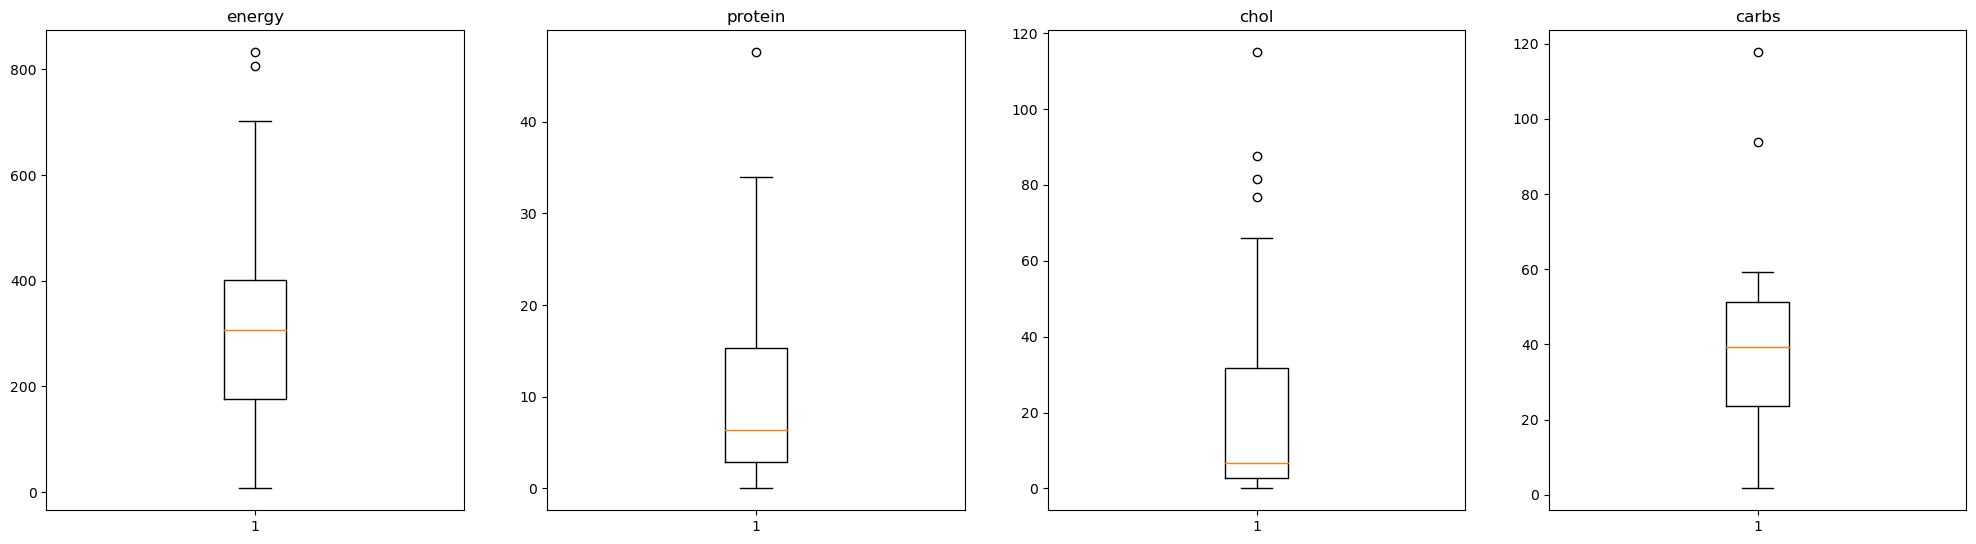

In [53]:
plt.subplot(1,4,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("energy")
plt.boxplot(df["energy"])

plt.subplot(1,4,2)
plt.title("protein")
plt.boxplot(df["protein"])

plt.subplot(1,4,3)
plt.title("chol")
plt.boxplot(df["chol"])

plt.subplot(1,4,4)
plt.title("carbs")
plt.boxplot(df["carbs"])

plt.show()

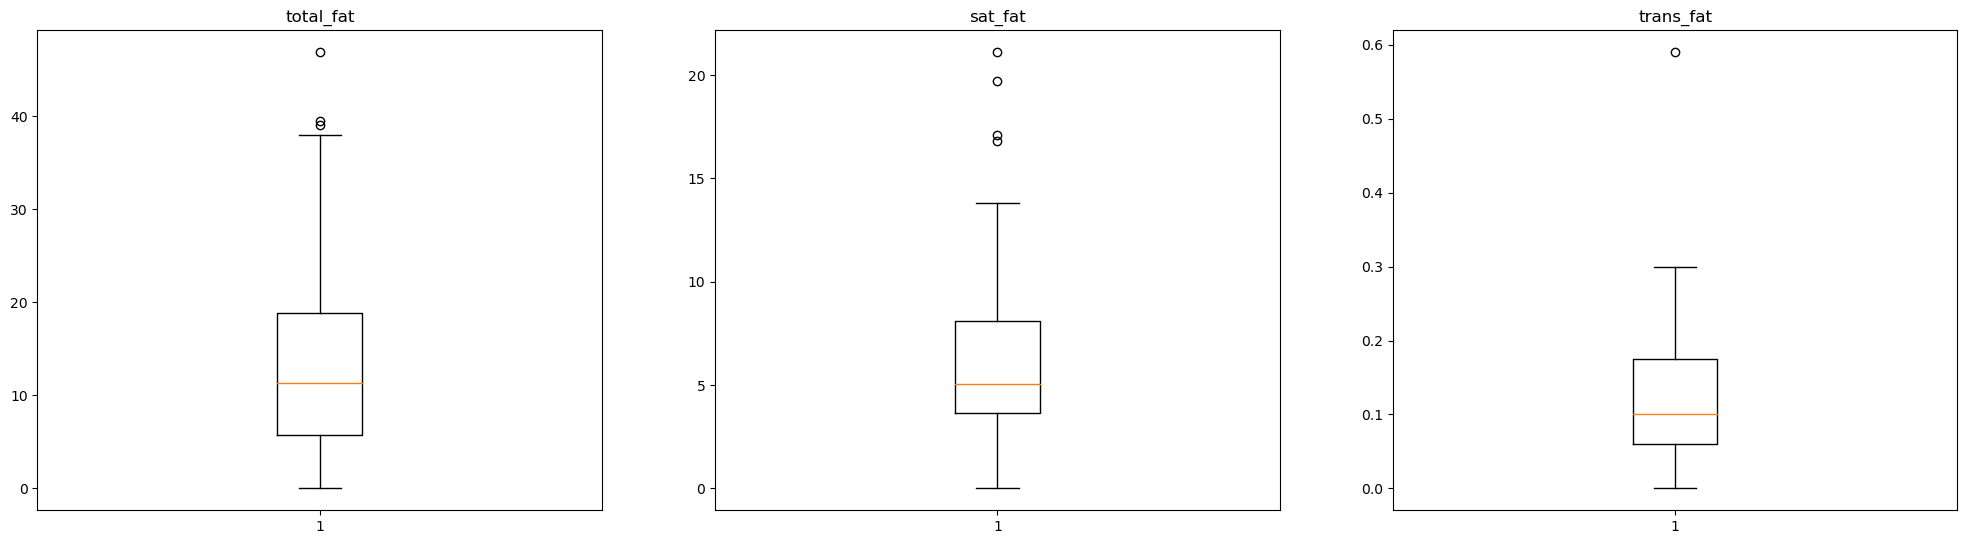

In [52]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("total_fat")
plt.boxplot(df["total_fat"])

plt.subplot(1,3,2)
plt.title("sat_fat")
plt.boxplot(df["sat_fat"])

plt.subplot(1,3,3)
plt.title("trans_fat")
plt.boxplot(df["trans_fat"])

plt.show()

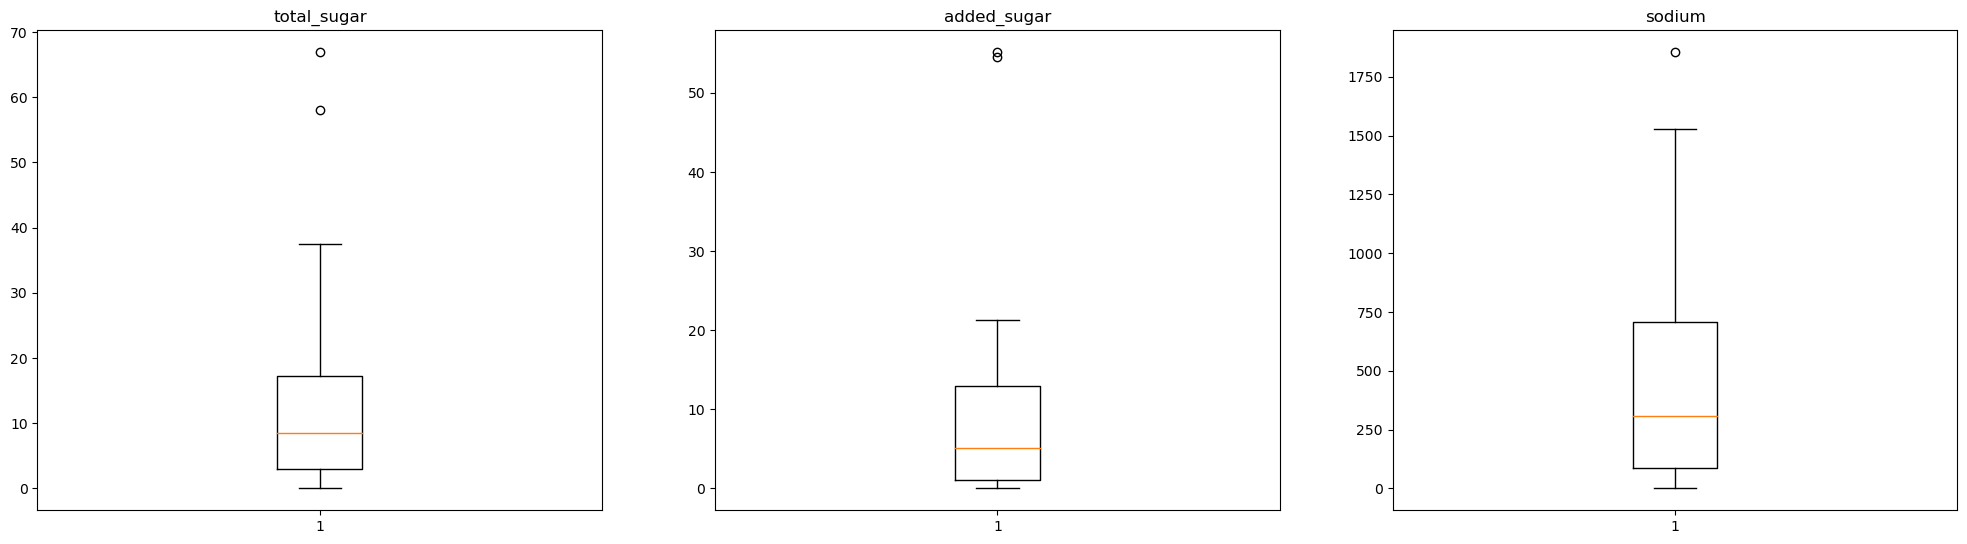

In [54]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("total_sugar")
plt.boxplot(df["total_sugar"])

plt.subplot(1,3,2)
plt.title("added_sugar")
plt.boxplot(df["added_sugar"])

plt.subplot(1,3,3)
plt.title("sodium")
plt.boxplot(df["sodium"])

plt.show()

In [66]:
for i in df.columns:
    if df[i].dtypes == "float64":
        print(i)

energy
protein
total_fat
sat_fat
trans_fat
chol
carbs
total_sugar
added_sugar
sodium


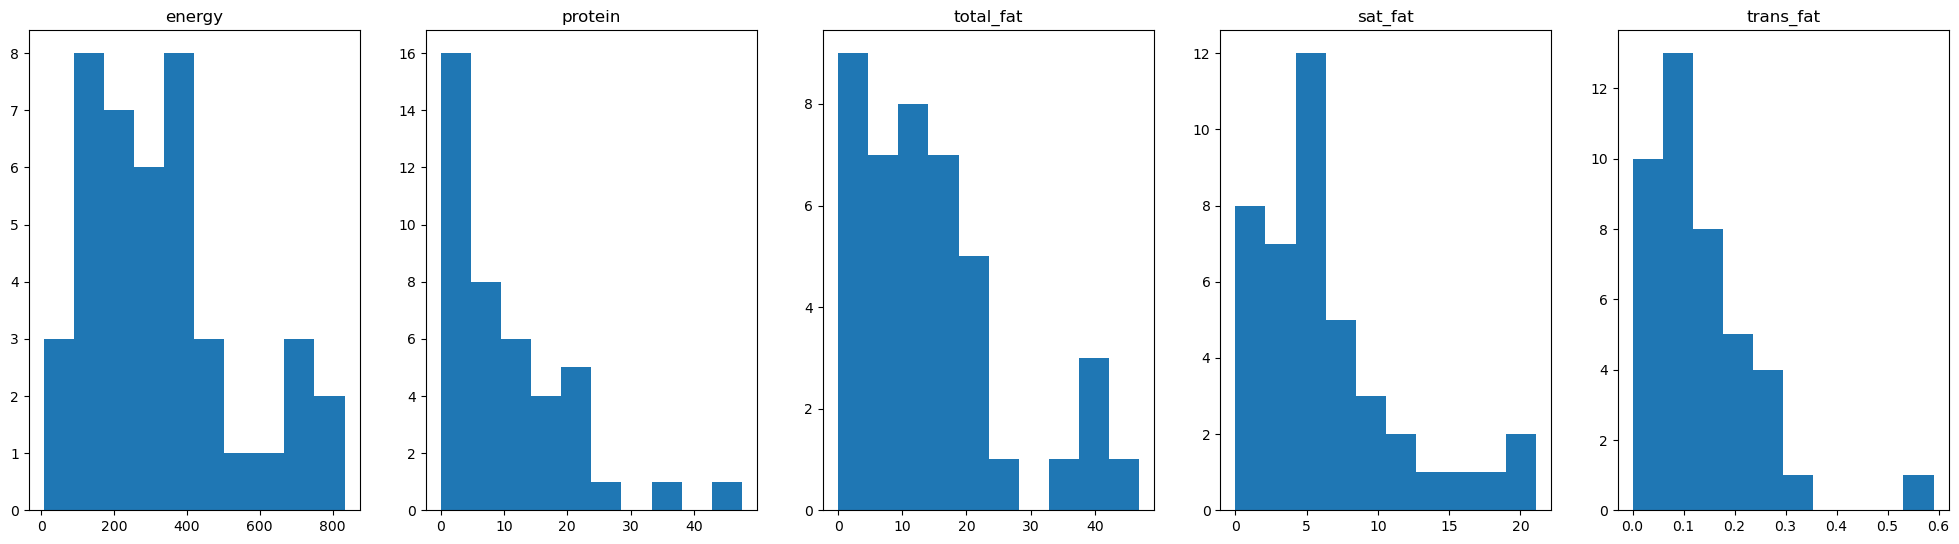

In [68]:
plt.subplot(1,5,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("energy")
plt.hist(df["energy"])

plt.subplot(1,5,2)
plt.title("protein")
plt.hist(df["protein"])

plt.subplot(1,5,3)
plt.title("total_fat")
plt.hist(df["total_fat"])

plt.subplot(1,5,4)
plt.title("sat_fat")
plt.hist(df["sat_fat"])

plt.subplot(1,5,5)
plt.title("trans_fat")
plt.hist(df["trans_fat"])

plt.show()

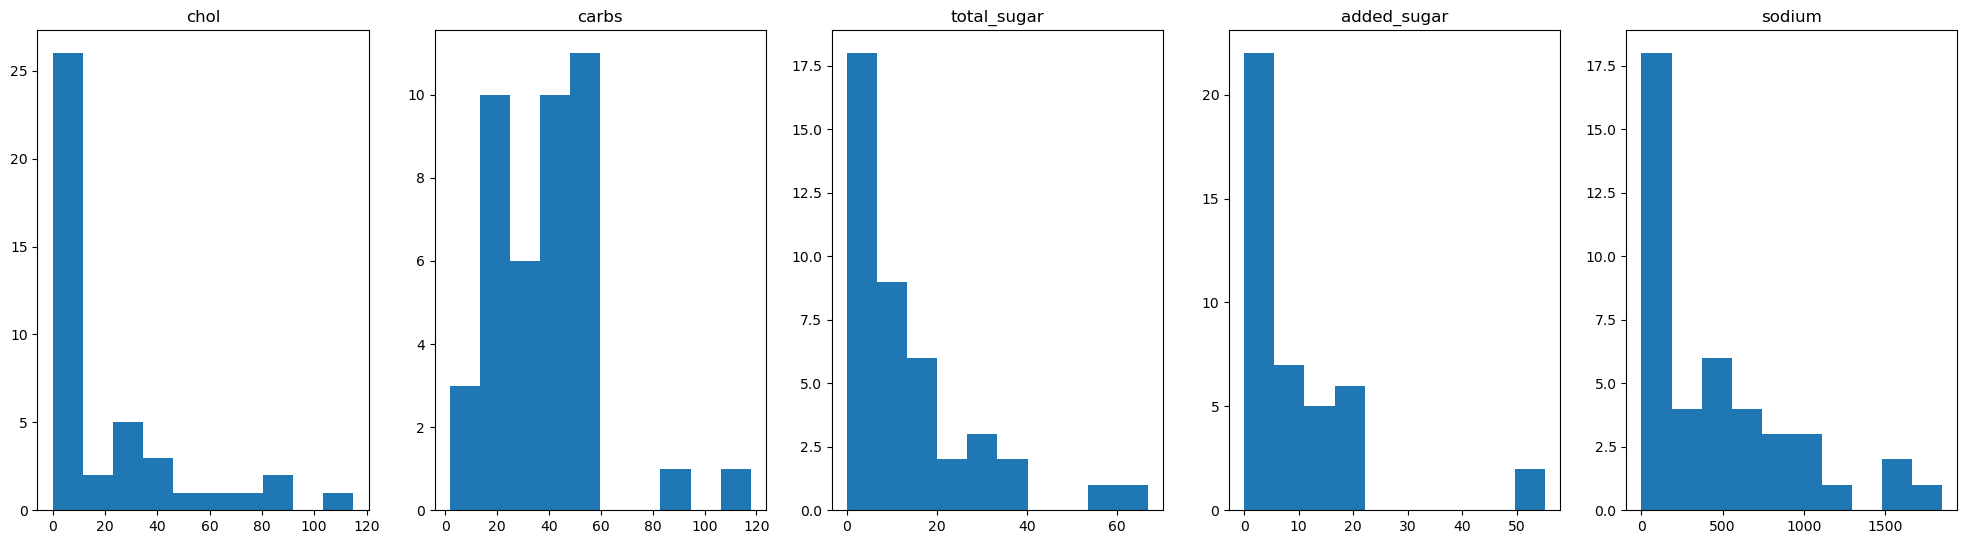

In [69]:
plt.subplot(1,5,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("chol")
plt.hist(df["chol"])

plt.subplot(1,5,2)
plt.title("carbs")
plt.hist(df["carbs"])

plt.subplot(1,5,3)
plt.title("total_sugar")
plt.hist(df["total_sugar"])

plt.subplot(1,5,4)
plt.title("added_sugar")
plt.hist(df["added_sugar"])

plt.subplot(1,5,5)
plt.title("sodium")
plt.hist(df["sodium"])

plt.show()

In [86]:
df["name"].value_counts()

Chicken McNuggets®               4
Our World Famous Fries®          3
McFlurry (Choco Crunch)®         2
Masala Chai®                     2
Sundae (Chocolate Brownie)®      2
McFlurry (Oreo)®                 2
Sundae (Chocolate)®              2
Sundae (Strawberry)®             2
Spicy Paneer Wrap®               1
McSpicy Chicken®                 1
Soft Serve Cone®                 1
Pizza McPuff®                    1
Veg Maharaja Mac®                1
McVeggie®                        1
McSwirl Chocolate®               1
McSpicy Paneer®                  1
Spicy Chicken Wrap®              1
Black Coffee®                    1
Butter Chicken Grilled Burger    1
McEgg®                           1
McChicken®                       1
McAloo Tikki Burger®             1
Iced Tea®                        1
Fillet-O-Fish®                   1
Dosa Masala Burger®              1
Cold Coffee®                     1
Cold Coffee Mcfloat®             1
Chicken Maharaja Mac®            1
Cheesy Fries        